Solves ODE for a simple 2D gravatiational orbit unsing
  Euler   and
  Runge-Kutta (RK4)



In [298]:
from math import sqrt
#constants and inital value u0
M = 20
G = 100
u0 = [10.0, 5.0, 10.0, 10.0]


u = [ u0 ]


timestep = 0.01

In [299]:
r = lambda x , y : sqrt(x**2 + y**2)

dudt = lambda u : [ u[2], u[3], -G*M*u[0]/(r(u[0],u[1])**3), -G*M*u[1]/(r(u[0],u[1])**3)]  #vx , vy , -GMx/r**2, -GMy/r**2


def vec_add(a,b):
    #len(a) has to be equal to len(b)
    c = []
    for i in range(len(a)):
        c.append( a[i]+b[i] )
    return c

def vec_mult(a,b):
    for i in range(len(b)):
        b[i] = a * b[i] 
    return b

def energy_of_u(u):
    e = []
    for i in u:
        energy = 1/2*(i[2]**2 + i[3]**2) - G*M/r(i[0],i[1])
        e.append(energy)
    return e

In [300]:
for t in range(int(10/timestep)):
    un1 = vec_add(u[-1] , vec_mult(timestep, dudt(u[-1])))
    u.append(un1)


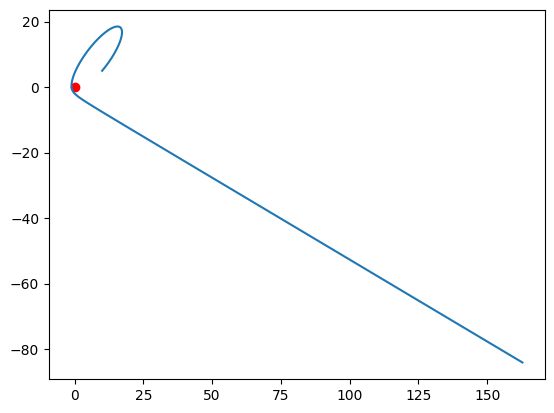

In [301]:
xs = [a[0] for a in u]
ys = [a[1] for a in u]


import matplotlib.pyplot as plt

plt.plot(xs, ys)
plt.scatter([0],[0], color = 'r')
plt.show()

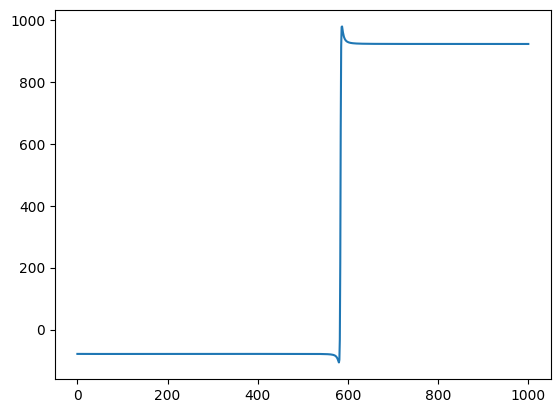

In [302]:


energy = energy_of_u(u)
plt.plot(list(range(len(energy))), energy)
plt.show()


Das Problem ist offensichtlich. Bei kleinen Abständen zum Zentralgestirn ist die Präzission in der Aberleitung nicht groß genug

### Runge-Kutta RK4


$$u_{i+1} = u_i + \frac{h}{6} \cdot \left( k_1 + 2K_2 + 2k_3+ k_4\right)$$
where
$$ k_1 = f(t_i, u_i)$$
$$ k_2 = f(t_i+\frac{h}{2}  , u_i+\frac{h}{2} \cdot k_1)$$
$$ k_3 = f(t_i +\frac{h}{2}, u_i+\frac{h}{2} \cdot k_2)$$
$$ k_4 = f(t_i + h, u_i + h\cdot k_2)$$

In [303]:
# define k1 to 4
h = timestep
k1 = lambda u: dudt(u)
k2 = lambda u : dudt( vec_add ( u , vec_mult( h/2 , k1(u))))
k3 = lambda u : dudt( vec_add ( u , vec_mult( h/2 , k2(u))))
k4 = lambda u : dudt( vec_add ( u , vec_mult( h , k3(u))))




In [304]:
urk = [u0]
for t in range(int(10/timestep)):
    sum_of_ks = vec_add(k1(urk[-1]), vec_add(vec_mult(2, k2(urk[-1])), vec_add( vec_mult(2, k3(urk[-1])), k4(urk[-1]))))
    urkn1 = vec_add(urk[-1] , vec_mult(timestep/6, sum_of_ks))
    urk.append(urkn1)


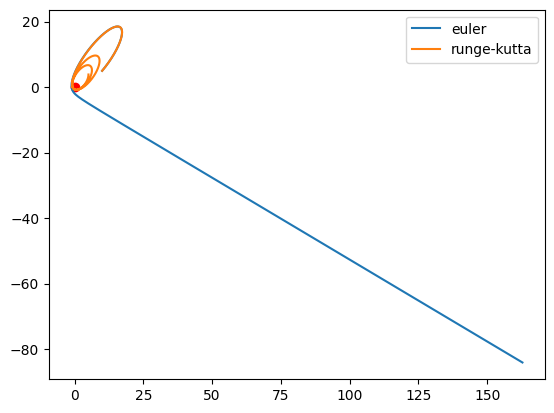

In [305]:
xrks = [a[0] for a in urk]
yrks = [a[1] for a in urk]


import matplotlib.pyplot as plt

plt.plot(xs, ys, label = "euler")
plt.plot(xrks, yrks, label = "runge-kutta")
plt.scatter([0],[0], color = 'r')
plt.legend()
plt.show()

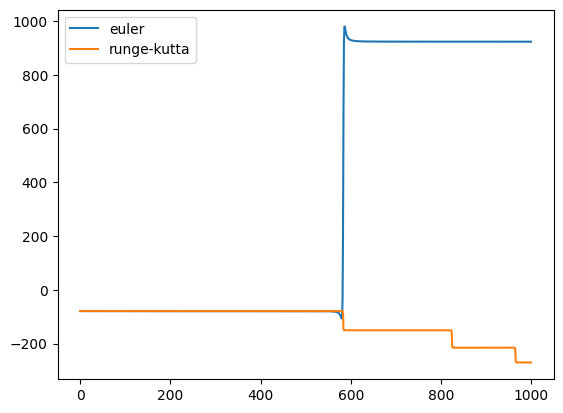

In [306]:
import matplotlib.pyplot as plt

energyrk = energy_of_u(urk)
plt.plot(list(range(len(energy))), energy, label = "euler")
plt.plot(list(range(len(energyrk))), energyrk, label = "runge-kutta")
plt.legend()
plt.show()

Offensichtlich viel genauer und die Energie bleibt eher "erhalten"

Beobachtung für unterschiedliche Schrittweiten $ \Delta t$

für $\Delta t = 0.001$ ist/wirkt der Orbit geschlossen und die Energie konstant


für $\Delta t = 0.1$ gehen die Werte noch schneller und stärker auseinander 